# **AirBnB Dataset**
## Notebook du projet *Python pour la Data Science*

Réalisé par:
- **ELHARRAN Ayoub** 
- **ELHAMDANI Mohamed Oussama**

**- Dataset Description**

This dataset describes the listing activity and metrics in NYC, NY for 2019. This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

**- Project Goal**

Our goal is to predict the price of a listing based on the data provided.

#######################################################################################################################

### Importing all the necessary libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import probplot

### Data understanding

In [2]:
df = pd.read_csv('Airbnb_dataset.csv')

C:\Users\oussa\AppData\Local\Temp\ipykernel_10572\2876849907.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_dataset.csv')


Exploring our dataset is essential to gain primary insights. To do so, we'll use some pandas functions to highlight key properties within the dataset.

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [5]:
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

### Dropping the columns that are not needed for the prediction.
* The columns we'll drop now are those that logically will not help to predict the price.  
* We'll see later a mathematical way to do it in the feature selection part.

In [8]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
columns_to_drop = ['id', 'NAME', 'host id', 'host name', 'neighbourhood group', 'neighbourhood', 'country',
       'country code', 'minimum nights', 'last review', 'reviews per month', 'availability 365', 'house_rules', 'license']
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   lat                             102591 non-null  float64
 2   long                            102591 non-null  float64
 3   instant_bookable                102494 non-null  object 
 4   cancellation_policy             102523 non-null  object 
 5   room type                       102599 non-null  object 
 6   Construction year               102385 non-null  float64
 7   price                           102352 non-null  object 
 8   service fee                     102326 non-null  object 
 9   number of reviews               102416 non-null  float64
 10  review rate number              102273 non-null  float64
 11  calculated host listings count  102280 non-null  float64
dtypes: float64(6), o

In [10]:
df.columns

Index(['host_identity_verified', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'number of reviews', 'review rate number',
       'calculated host listings count'],
      dtype='object')

In [11]:
df.head()

,host_identity_verified,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,number of reviews,review rate number,calculated host listings count
0,unconfirmed,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,9.0,4.0,6.0
1,verified,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,45.0,4.0,2.0
2,NaN,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,0.0,5.0,1.0
3,unconfirmed,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,270.0,4.0,1.0
4,verified,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,9.0,3.0,1.0


### Handling categorical & missing data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   lat                             102591 non-null  float64
 2   long                            102591 non-null  float64
 3   instant_bookable                102494 non-null  object 
 4   cancellation_policy             102523 non-null  object 
 5   room type                       102599 non-null  object 
 6   Construction year               102385 non-null  float64
 7   price                           102352 non-null  object 
 8   service fee                     102326 non-null  object 
 9   number of reviews               102416 non-null  float64
 10  review rate number              102273 non-null  float64
 11  calculated host listings count  102280 non-null  float64
dtypes: float64(6), o

So as we see, we have 6 categorical data columns: host_identity_verified, instant_bookable, cancellation_policy, room type, price and service fee.

- For the price and service fee, we'll just have to remove the dollar sign and convert the string to float.

In [13]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   lat                             102591 non-null  float64
 2   long                            102591 non-null  float64
 3   instant_bookable                102494 non-null  object 
 4   cancellation_policy             102523 non-null  object 
 5   room type                       102599 non-null  object 
 6   Construction year               102385 non-null  float64
 7   price                           102352 non-null  float64
 8   service fee                     102326 non-null  float64
 9   number of reviews               102416 non-null  float64
 10  review rate number              102273 non-null  float64
 11  calculated host listings count  102280 non-null  float64
dtypes: float64(8), o

- #### Handling the missing values for the price and service fee columns

In [15]:
df.isnull().sum()

host_identity_verified            289
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
number of reviews                 183
review rate number                326
calculated host listings count    319
dtype: int64

A knwon technique to handle missing values is by either by replacing them by the mean or median (if the values of the column of interest are normaly distributed) or by the mode which is the most frequent value taken by this random variable.
To confirm that the values aren't normaly disributed we 'll this technique: QQ-plots:
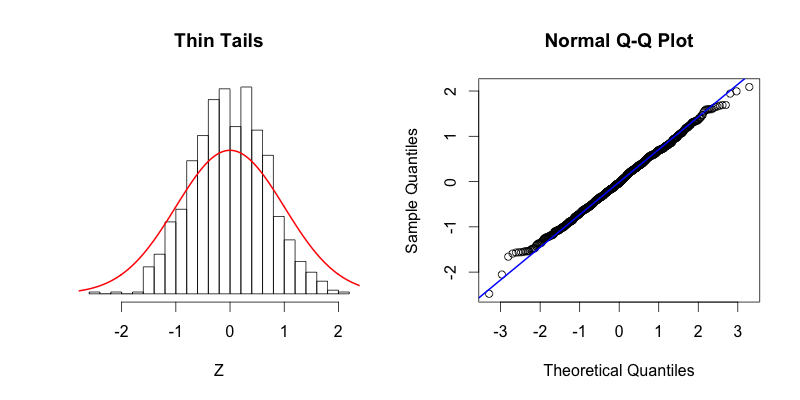

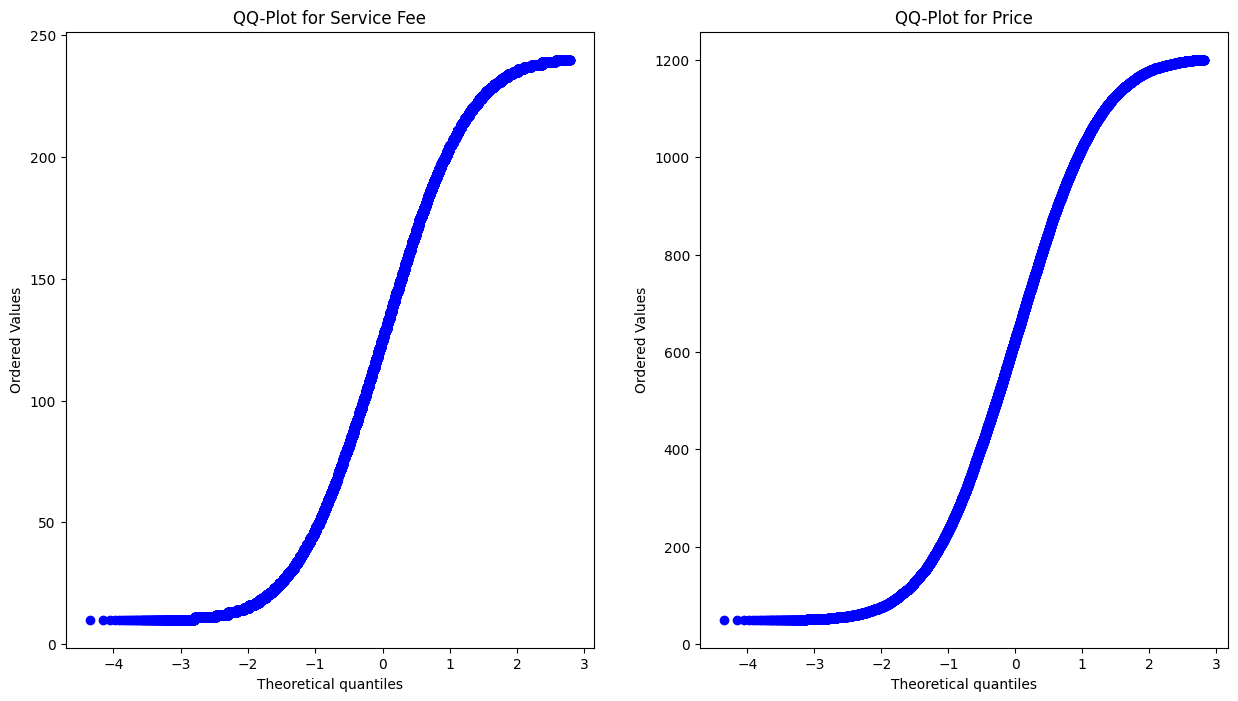

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# QQ-plot for 'service fee' column
probplot(df['service fee'], plot=ax[0], fit=True)
ax[0].set_title('QQ-Plot for Service Fee')

# QQ-plot for 'price' column
probplot(df['price'], plot=ax[1], fit=True)
ax[1].set_title('QQ-Plot for Price')

plt.show()

We can also plot the proabability densities of the two columns for this normality test:

Text(0.5, 1.0, 'Pdf & Histogram')

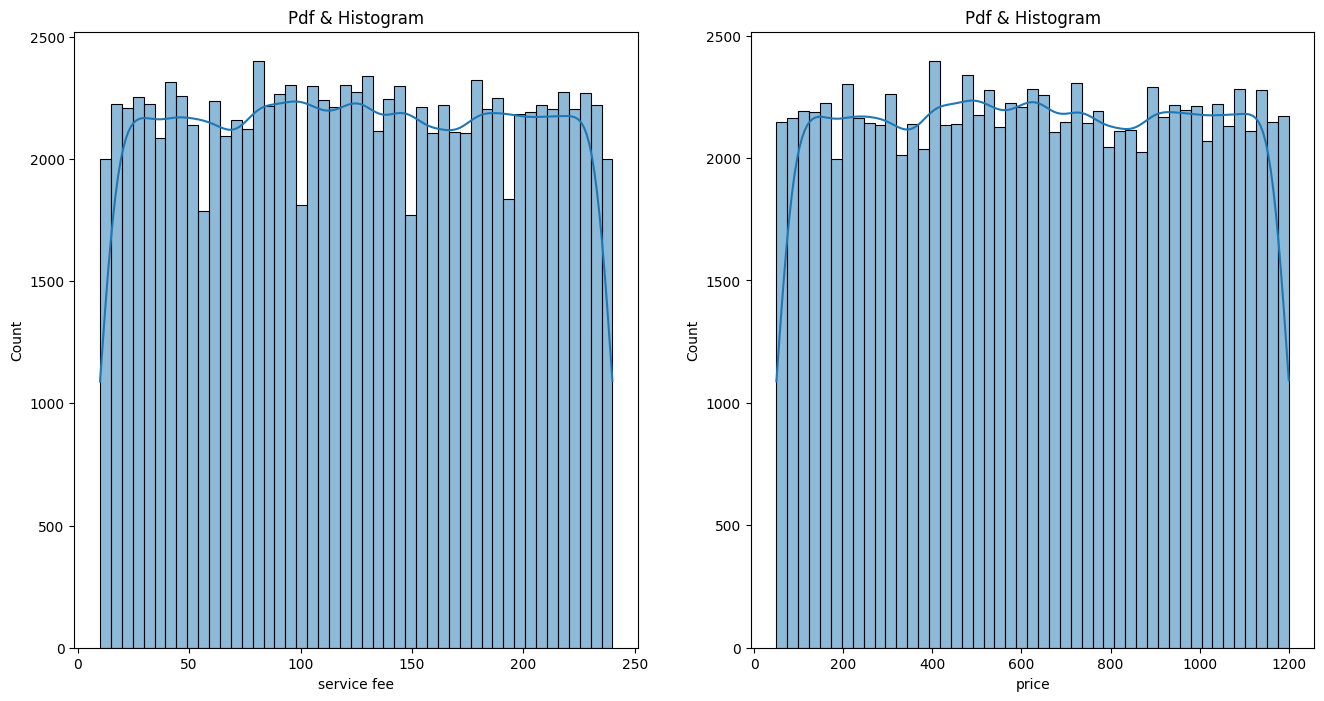

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Histogram for the service fee 
sns.histplot(df['service fee'], kde=True, ax=ax[0])
ax[0].set_title('Pdf & Histogram')

# Histogram for the price 
sns.histplot(df['price'], kde=True, ax=ax[1])
ax[1].set_title('Pdf & Histogram')

This strongly ensure not having The serivice fee and The price being normaly distributed.
We' ll use mode then to fill the missing values:

In [27]:
df['price'].fillna(df['price'].mode().iloc[0], inplace=True)
df['service fee'].fillna(df['service fee'].mode().iloc[0], inplace=True)

- For the remaining columns: LabelEncoder() automatically converts the nan into a numerical category as shown bellow().
* This technique can be used, but it's not recommended. We'll use it here because the number of NaN values is not numerous. The use of mode is more appropriate in general scenarias.

- #### In this stage we simultaneously handle missing values and we convert columns of type 'object' into numerical types. 

In [28]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])
        print(f"\nMapping of '{column}' categories to encoded values:")
        for original_category, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
            print(f"{original_category}: {encoded_value}")
            
df.head()


Mapping of 'host_identity_verified' categories to encoded values:
unconfirmed: 0
verified: 1
nan: 2

Mapping of 'instant_bookable' categories to encoded values:
False: 0
True: 1
nan: 2

Mapping of 'cancellation_policy' categories to encoded values:
flexible: 0
moderate: 1
strict: 2
nan: 3

Mapping of 'room type' categories to encoded values:
Entire home/apt: 0
Hotel room: 1
Private room: 2
Shared room: 3


,host_identity_verified,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,number of reviews,review rate number,calculated host listings count
0,0,40.64749,-73.97237,0,2,2,2020.0,966.0,193.0,9.0,4.0,6.0
1,1,40.75362,-73.98377,0,1,0,2007.0,142.0,28.0,45.0,4.0,2.0
2,2,40.80902,-73.94190,1,0,2,2005.0,620.0,124.0,0.0,5.0,1.0
3,0,40.68514,-73.95976,1,1,0,2005.0,368.0,74.0,270.0,4.0,1.0
4,1,40.79851,-73.94399,0,1,0,2009.0,204.0,41.0,9.0,3.0,1.0


* Handling missing values by just deleting rows containing those values can be done since missing values are not numerous so the those values will not hurt the model.

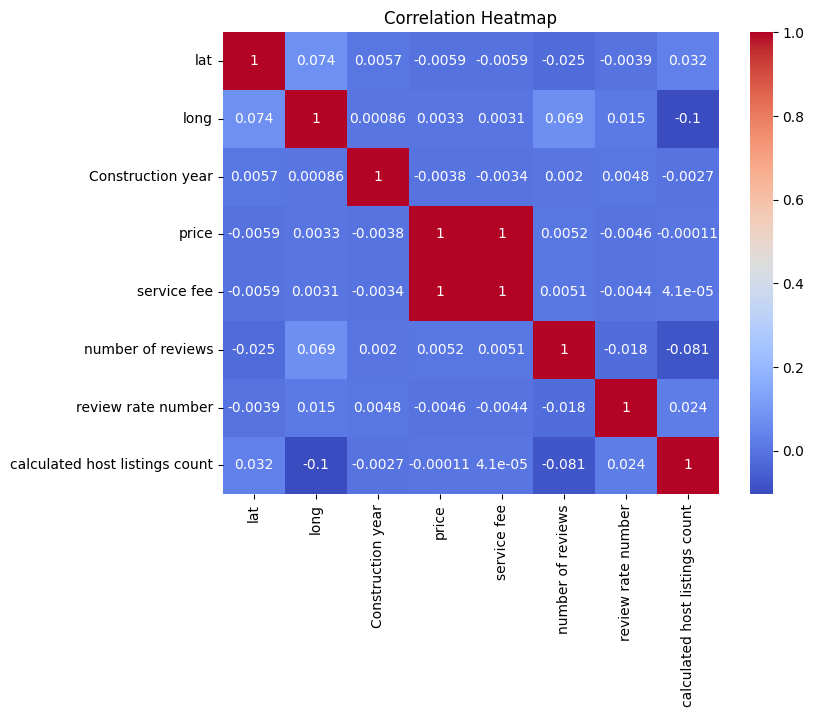

In [17]:
# Calculating correlation matrix
correlation_matrix = df.corr(numeric_only=True)
#price_correlation = correlation_matrix['price']
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()